In this analysis we use information from a old car and we are predicting the the prices of an old car.
To be more Specific we are predicting the price of a used car based on its specifications

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('1.04. Real-life example.csv')

In [3]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


The potential predictor can be Brand(BMW is Quiet Expensive that mitshubishi),Mileage( It signify for long long the car has been used), EngineV(Sports car have higher engine version) and Year(older the car the cheaper the price---- except for some vintage cars )

Once the data has been loaded now its time of
### Data Preprocessing

In [4]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


Here we got description of only the variables that are integers by default but if we pass an argument include =all then we can et description of all the data

In [5]:
df.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Now we have the description of categorical variables too
From here we only do analysis of the variables that are important for us .i.e removing the unnecessary variables
Model number is not important for us for predicting so we drop this variable


In [6]:
df1 = df.drop(['Model'], axis = 1)
df1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Now it time to deal with the missing value. There are several ways for dealing with it. It is clear from the above table that the count of Price and EngineV is not equal to total number

In [7]:
df1.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [8]:
df1.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

There are 172 null values in Price and 150 null values in EngineV. Many ways for handeling the null values. I'm going to drop the rows containing the Null values.\
Now lets apply the Data Science rule of thumb:\
if we are removing <5% of observations, we are free to just remove all that have MV(Missing Values)
In our case these null values are less than 5% so we are going to remove its axis = 0(row contining the null values)

In [9]:
# nomissingvalues Data Frame
df2 = df1.dropna(axis = 0) 

In [10]:
df2.describe(include = 'all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Now we are looking for the nature of variables by drawing some graph form seaborn libraries

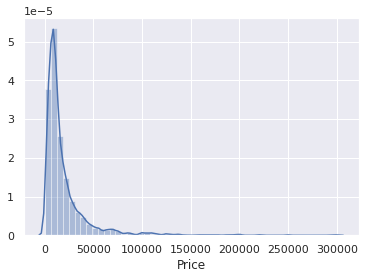

In [11]:
sns.distplot(df2['Price'])

For a optimal result we will be always looking for the normal distribution but in our case it is exponential distribution so it can causes a problem in regression model. We can see from the descibe table that  the min price is 600 and max price is 300000 obviously we have outliers in price section so frst we handel these item

### Outlier Detection
\
This is a process of removing the outliers.


In [12]:
q = df2['Price'].quantile(0.99)
df3 = df2[df2['Price'] < q]
df3.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


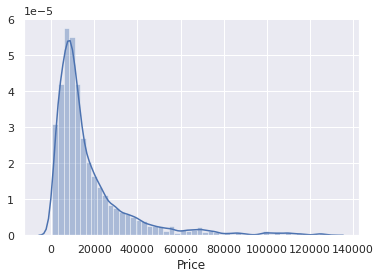

In [13]:
sns.distplot(df3['Price'])

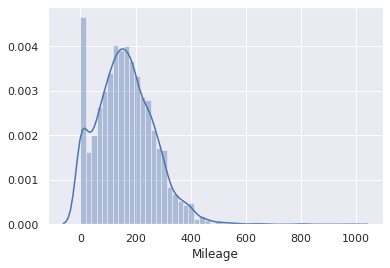

In [14]:
sns.distplot(df2['Mileage'])

In [21]:
q = df1['Mileage'].quantile(0.99)
df3 = df1[df1['Mileage'] < q]

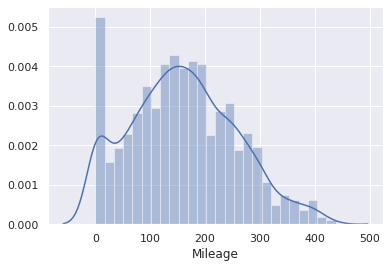

In [23]:
sns.distplot(df3['Mileage'])

Here we have very less amount of outlier in mileage variables

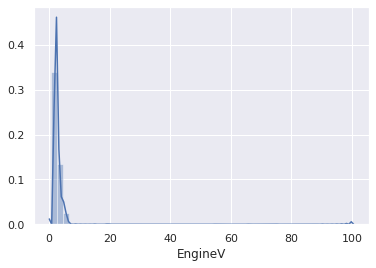

In [24]:
sns.distplot(df2['EngineV'])

This occur because enginev has many false data. Generally its values lies between 0.6 to 6.5

In [25]:
df3 = df2[df2['EngineV']<6.5]

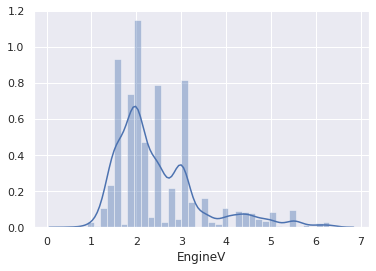

In [27]:
sns.distplot(df3['EngineV'])

Now our last predictor is year so lets see the graph of Year

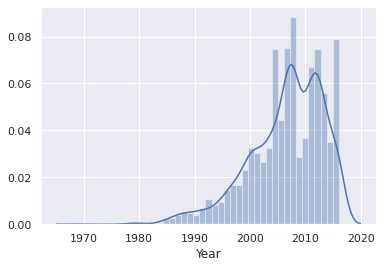

In [30]:
sns.distplot(df1['Year'])

This tail might be due to some high price vinatge cars so lets filter them

In [31]:
q = df3['Year'].quantile(0.01)

In [32]:
df4 = df3[df3['Year']>q]

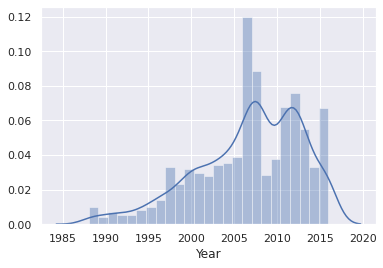

In [33]:
sns.distplot(df4['Year'])

Finally we get the cleaned data Now we have completed Data Preprocessing from here

In [34]:
cleaned_data = df4.reset_index(drop = True)

In [35]:
cleaned_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3946,3946.000000,3946,3946.000000,3946.000000,3946,3946,3946.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,861,NaN,1488,NaN,NaN,1843,3581,NaN
mean,NaN,19847.091766,NaN,162.542575,2.474083,NaN,NaN,2006.705525
std,NaN,25973.518631,NaN,103.009711,0.976992,NaN,NaN,6.199632
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


We have deleted almost 250 observations. These observations were problamatic observations

### Checking the OLS system

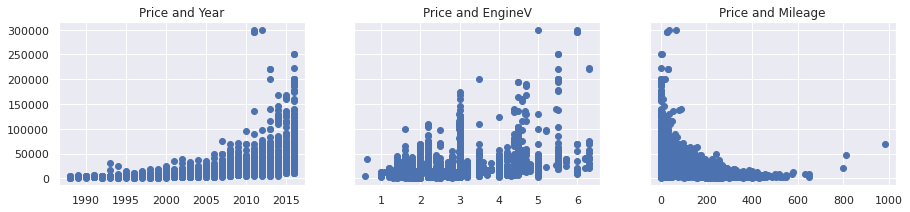

In [36]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(cleaned_data['Year'],cleaned_data['Price'])
ax1.set_title('Price and Year')
ax2.scatter(cleaned_data['EngineV'],cleaned_data['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(cleaned_data['Mileage'],cleaned_data['Price'])
ax3.set_title('Price and Mileage')

plt.show()

This is the Scatter plot of predictive variables with respect to price and None of them is linear so we need to transform these patterns into linear model.This happens because price graph is also not linearly distributed so We need to transform data sets. 

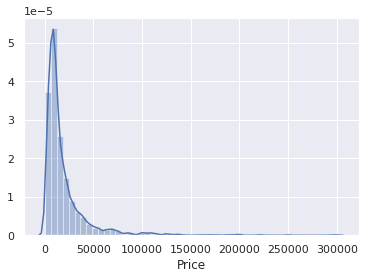

In [38]:
sns.distplot(cleaned_data['Price'])

### Relaxing the price variables

In [39]:
# Let's transform 'Price' with a log transformation
log_price = np.log(cleaned_data['Price'])

# Then we add it to our data frame
cleaned_data['log_price'] = log_price
cleaned_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3941,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3942,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3943,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3944,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Lets check the scatter plot once again for three variables

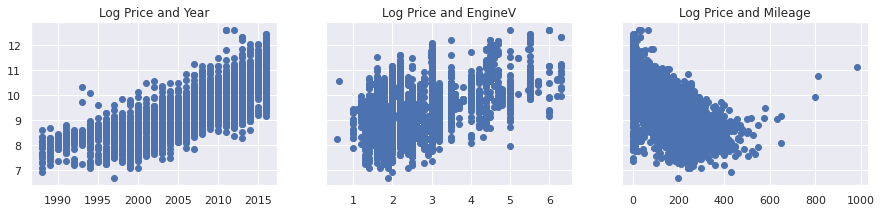

In [41]:

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(cleaned_data['Year'],cleaned_data['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(cleaned_data['EngineV'],cleaned_data['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(cleaned_data['Mileage'],cleaned_data['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

he relationships show a clear linear relationship. This is some good linear regression material
### Alternatively we could have transformed each of the independent variables
But changing price variable was much more easy one\
Since we will be using the log price variable, we can drop the old 'Price' one

In [47]:
for i in cleaned_data.columns:
    print (i)


Brand
Body
Mileage
EngineV
Engine Type
Registration
Year
log_price


### Now its time for Multicollinearity
Multicollinearity is a common problem when estimating linear or generalized linear models, including logistic regression and Cox regression. It occurs when there are high correlations among predictor variables, leading to unreliable and unstable estimates of regression coefficients. Most data analysts know that multicollinearity is not a good thing.  But many do not realize that there are several situations in which multicollinearity can be safely ignored.

Before examining those situations, let’s first consider the most widely-used diagnostic for multicollinearity, the variance inflation factor (VIF). The VIF may be calculated for each predictor by doing a linear regression of that predictor on all the other predictors, and then obtaining the R2 from that regression. The VIF is just 1/(1-R2).

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [49]:
vif

,VIF,Features
0,3.468857,Mileage
1,10.088472,Year
2,7.420555,EngineV


Since Year has the highest VIF, I will remove it from the model
This will drive the VIF of other variables down!!! So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case


In [51]:
data_no_multicollinearity = cleaned_data.drop(['Year'],axis=1)

### Create dummy Variables

In [52]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [54]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### organiznig the data set

In [55]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [56]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [57]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model
### Declare the inputs and the targets

In [58]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [59]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [61]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [63]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

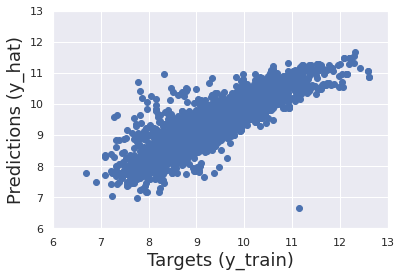

In [65]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

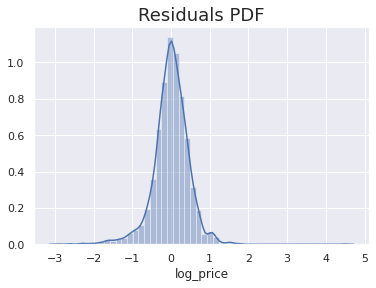

In [66]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [67]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.7413746071554278

### Finding the weights and bias

In [68]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.43158031884159

In [69]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([-0.47036653,  0.2450589 ,  0.02516684,  0.03778492, -0.1276864 ,
       -0.1675706 , -0.04642295, -0.08367983, -0.14603206, -0.09366301,
       -0.20028912, -0.12182503, -0.15775095, -0.13353477, -0.0341752 ,
       -0.13690759,  0.31836359])

In [87]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.47
1,EngineV,0.25
2,Brand_BMW,0.03
3,Brand_Mercedes-Benz,0.04
4,Brand_Mitsubishi,-0.13
5,Brand_Renault,-0.17
6,Brand_Toyota,-0.05
7,Brand_Volkswagen,-0.08
8,Body_hatch,-0.15
9,Body_other,-0.09


A positive weight shows that as a feature increases in value, so do the log_price and price\
A negative weight shows that as a feature increases in value, log_price and price decreases\
For Dummy variables \
 A positive weight shows that respective category (Brand)  is more expensive than the benchmark(Audi)\
 A negative weight shows that respective category (Brand)  is less expensive than the benchmark(Audi)\


In [99]:
# Check the different categories in the 'Brand' variable
cleaned_data['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing How our model performed

In [100]:
y_hat_test = reg.predict(x_test)

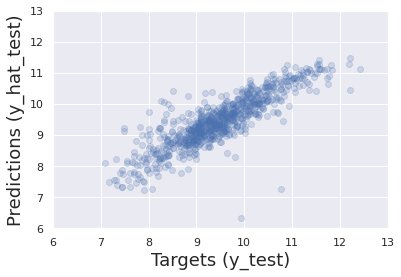

In [90]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [91]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10592.80
1,9772.84
2,19661.41
3,34132.18
4,16020.89


In [92]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10592.80,8950.00
1,9772.84,22500.00
2,19661.41,9999.00
3,34132.18,29500.00
4,16020.89,7200.00
5,9107.92,14500.00
6,4798.27,4600.00
7,31249.39,30500.00
8,10506.32,8500.00
9,12017.20,13000.00


In [93]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    9.10
1   10.02
2    9.21
3   10.29
4    8.88
Name: log_price, dtype: float64

In [94]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10592.80,8950.00
1,9772.84,22500.00
2,19661.41,9999.00
3,34132.18,29500.00
4,16020.89,7200.00
5,9107.92,14500.00
6,4798.27,4600.00
7,31249.39,30500.00
8,10506.32,8500.00
9,12017.20,13000.00


In [95]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [96]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10592.80,8950.00,-1642.80,18.36
1,9772.84,22500.00,12727.16,56.57
2,19661.41,9999.00,-9662.41,96.63
3,34132.18,29500.00,-4632.18,15.70
4,16020.89,7200.00,-8820.89,122.51
5,9107.92,14500.00,5392.08,37.19
6,4798.27,4600.00,-198.27,4.31
7,31249.39,30500.00,-749.39,2.46
8,10506.32,8500.00,-2006.32,23.60
9,12017.20,13000.00,982.80,7.56


In [97]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,790.00,790.00,790.00,790.00
mean,17484.53,20418.72,2934.20,37.08
std,15432.63,25352.03,14986.95,55.24
min,560.94,1200.00,-27832.50,0.13
25%,7655.71,7362.50,-2254.91,12.46
50%,12221.45,12300.00,345.93,24.79
75%,21881.92,23475.00,3994.11,41.47
max,95585.31,250000.00,182074.15,562.27


In [98]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
507,9887.41,9900.00,12.59,0.13
256,3784.45,3800.00,15.55,0.41
759,3717.92,3700.00,-17.92,0.48
773,3971.78,4000.00,28.22,0.71
59,11394.33,11500.00,105.67,0.92
599,12877.05,12999.00,121.95,0.94
544,7127.94,7200.00,72.06,1.00
735,28570.68,28900.00,329.32,1.14
445,5729.06,5800.00,70.94,1.22
655,7502.88,7400.00,-102.88,1.39
